### Evaluating different betting strategies through simulations 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import random

#### Kelly Criterion

0.1


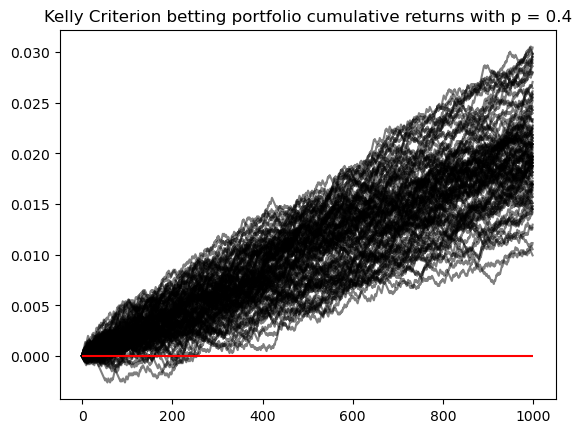

In [16]:

def KC_bets(n_bets, s,  p, w, l, C0) :
    q = 1 - p
    k = round(((w / l) * p - q) / (w / l),2)
    bet_results = np.random.choice([w, - l], (n_bets, s), p = [p, 1 - p])
    payoff = np.vstack([np.ones((1, s)), bet_results + 1 ])
    C = np.zeros((n_bets,s))
    C[0, :] = C0
    for i in range(1, n_bets) : 
        C[i, :] = (C[i - 1, :] * (1 - k) )  + (C[i - 1, :] * k ) * payoff[i, : ]

    print(k)
    return C

N = 1000
KC_resultado = KC_bets(N, 100,  0.40, 0.002, 0.001, 100)

plt.plot(KC_resultado / 100 - 1, c = 'k', alpha = 0.5)
plt.hlines(0,0, N, colors= 'r')
plt.title(f'Kelly Criterion betting portfolio cumulative returns with p = {0.4}')
plt.show()